In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [2]:
skin_dir = 'data'

In [3]:
path_dir = {os.path.splitext(os.path.basename(x))[0]:x for x in glob(os.path.join(skin_dir,'*','*.jpg'))}

type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [4]:
meta_df = pd.read_csv('data/HAM10000_metadata.csv')

meta_df['path'] = meta_df['image_id'].map(path_dir.get)
meta_df['cell_type'] = meta_df['dx'].map(type_dict.get)
meta_df['cell_type_idx'] = pd.Categorical(meta_df['cell_type']).codes
meta_df.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
1761,HAM_0005274,ISIC_0032766,mel,histo,55.0,male,upper extremity,data\HAM10000_images_part_2\ISIC_0032766.jpg,Melanoma,5
2727,HAM_0007313,ISIC_0028739,bcc,histo,70.0,male,back,data\HAM10000_images_part_1\ISIC_0028739.jpg,Basal cell carcinoma,1
1853,HAM_0002617,ISIC_0033393,mel,histo,60.0,male,upper extremity,data\HAM10000_images_part_2\ISIC_0033393.jpg,Melanoma,5


In [5]:
unduplicated_df = meta_df.groupby('lesion_id').count()
unduplicated_df = unduplicated_df[unduplicated_df['image_id'] == 1]
unduplicated_df.reset_index(inplace=True)
unduplicated_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000001,1,1,1,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1,1,1,1


In [6]:
def get_duplicates(x):
    unique_list = list(unduplicated_df['lesion_id'])
    if x in unique_list:
        return 'unduplicated'
    else:
        return 'duplicated'

meta_df['duplicates'] = meta_df['lesion_id']
meta_df['duplicates'] = meta_df['duplicates'].apply(get_duplicates)
meta_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,data\HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis,2,duplicated
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,data\HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis,2,duplicated
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,data\HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis,2,duplicated
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,data\HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis,2,duplicated
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,data\HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis,2,duplicated


In [7]:
meta_df['duplicates'].value_counts()

unduplicated    5514
duplicated      4501
Name: duplicates, dtype: int64

In [8]:
meta_df.describe(exclude = [np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,path,cell_type,duplicates
count,10015,10015,10015,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15,10015,7,2
top,HAM_0000835,ISIC_0024751,nv,histo,male,back,data\HAM10000_images_part_2\ISIC_0032785.jpg,Melanocytic nevi,unduplicated
freq,6,1,6705,5340,5406,2192,1,6705,5514


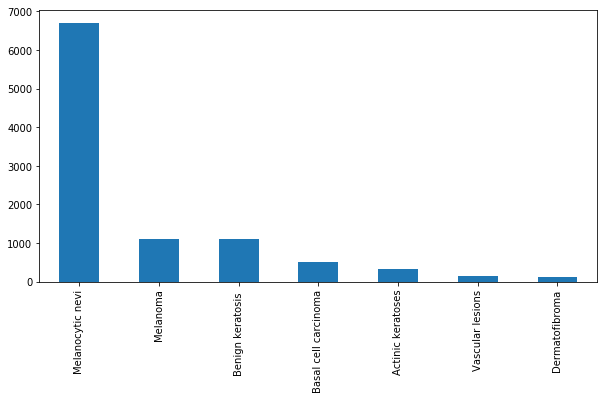

In [9]:
fig,ax1 = plt.subplots(1,1,figsize=(10,5))
meta_df['cell_type'].value_counts().plot(kind='bar',ax=ax1)

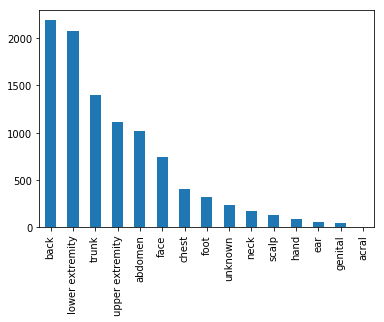

In [10]:
meta_df['localization'].value_counts().plot(kind='bar')

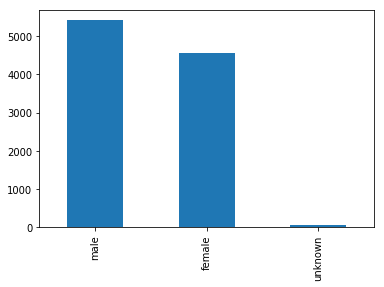

In [11]:
meta_df['sex'].value_counts().plot(kind='bar')

In [12]:
meta_df.to_csv("modified_meta.csv")

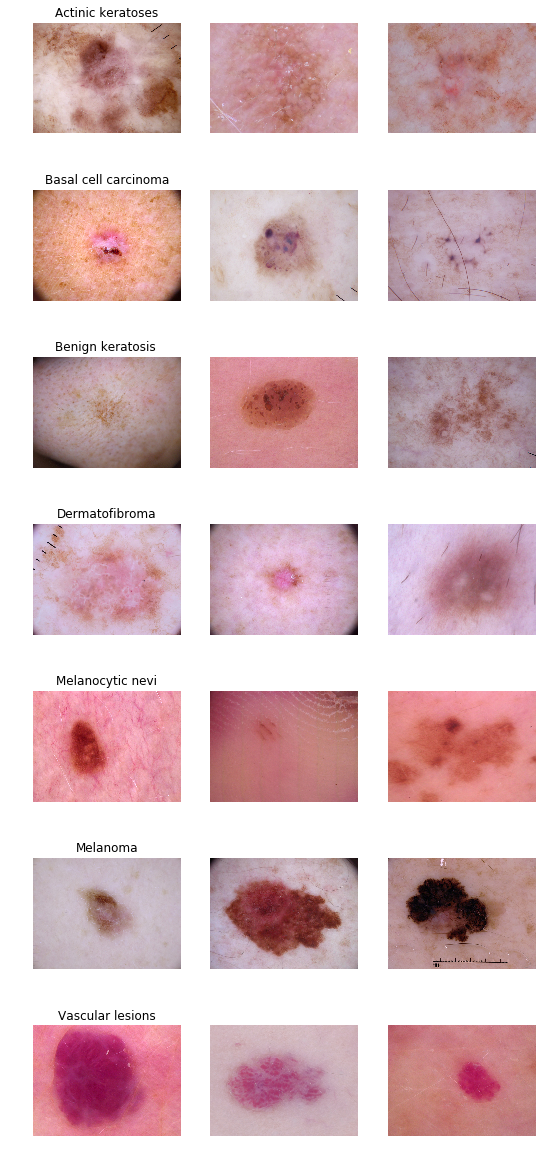

In [13]:
n = 3
fig,m_axs = plt.subplots(7,n,figsize=(3*n,3*7))

for n_axs, (type_name,type_rows) in zip(m_axs,meta_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax,(_,c_row) in zip(n_axs,type_rows.sample(n,random_state = 9).iterrows()):
        c_ax.imshow(Image.open(c_row['path']))
        c_ax.axis("off")
fig.savefig('category_sample.png',dpi=300)